In [37]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
sys.path.append("../")
from src.events.IC.event_processing import list_of_params_nsi
from src.probability.functions import nufit_params_nsi
from src.plotter import nsi_flux_oscillogram

steps = 50 # 500

IC_limits = (np.log10(284), np.log10(103821))
DC_limits = (np.log10(1.9), np.log10(1000))


In [38]:
params = nufit_params_nsi.copy()
anti = True
s24_range = [0.032]
params.update(
    {
        "theta_24": np.arcsin(np.sqrt(0.032)) / 2,
        "dm_41": 0.93,
        "theta_34": np.arcsin(np.sqrt(0)) / 2,
    }
)
emt_strong_range = [-5e-2, 0, 5e-2]
emt_strong_params = list_of_params_nsi(params, s24_range, [0], emt_strong_range)

emt_weak_range = [-1e-2, 0, 1e-2]
emt_weak_params = list_of_params_nsi(params, s24_range, [0], emt_weak_range)
zenith = -1

z_range = np.linspace(-1, 0, steps)
IC_range = np.logspace(
    IC_limits[0], IC_limits[1], steps
)  
# 99.5%: np.log10(284), np.log10(103821), obtained from get_Etrue(model, 3,0.995,0.995,E_index=0)[0][0] #get_Etrue(model, 3,0.995,0.995,E_index=12)[0][2]
DC_range = np.logspace(
    DC_limits[0], DC_limits[1], steps
)  

# 99.5%: np.log10(1.9), np.log10(210) obtained from MC2018_DC().query('pid==1').query('abs(pdg) == 14').query('reco_energy == reco_energy.min()')['true_energy'].quantile(0.005)


In [39]:

flux_emt_IC_track = np.array(
    nsi_flux_oscillogram(IC_range, z_range, emt_strong_params[0])
)
flux_emt_DC_track = np.array(
    nsi_flux_oscillogram(DC_range, z_range, emt_strong_params[0])
)

pickle.dump(flux_emt_IC_track, open("../pre_computed/flux_emt_IC_track.p", "wb"))
pickle.dump(flux_emt_DC_track, open("../pre_computed/flux_emt_DC_track.p", "wb"))

In [40]:
z_range = np.linspace(-1, 0, steps)
IC_range = np.logspace(IC_limits[0], IC_limits[1], steps)
DC_range = np.logspace(DC_limits[0], DC_limits[1], steps)
flux_emt_IC_track = pickle.load(open("../pre_computed/flux_emt_IC_track.p", "rb"))
flux_emt_DC_track = pickle.load(open("../pre_computed/flux_emt_DC_track.p", "rb"))

In [41]:
from matplotlib.colors import CenteredNorm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

matplotlib.rc("text", usetex=False)
viridis = cm.get_cmap("viridis", 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248 / 256, 24 / 256, 148 / 256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)


def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-0.6, vmax=1.6)
        fig.colorbar(psm, ax=ax)
    plt.show()

track_cmap_dict = {
    "red": ((0.0, 1.0, 10), (0.32, 1.0, 1.0), (0.75, 1.0, 1.0), (1.0, 0.4, 1.0)),
    "green": ((0.0, 0.0, 0.3), (0.32, 1.0, 1.0), (0.75, 0.1, 0.1), (1.0, 0.0, 0.0)),
    "blue": ((0.0, 0.0, 0.6), (0.3, 1.0, 1.0), (0.75, 0.1, 0.1), (1.0, 0.0, 0.0)),
}
    
dc_dict = {
    "red": ((0.0, 0.0, 0), (0.32, 1.0, 1.0), (0.75, 1.0, 1.0), (1.0, 0.4, 1.0)),
    "green": ((0.0, 0.1, 0.2), (0.32, 1.0, 1.0), (0.75, 0.2, 0.2), (1.0, 0.0, 0.0)),
    "blue": ((0.0, 0.1, 0.5), (0.32, 1.0, 1.0), (0.75, 0.0, 0.0), (1.0, 0.0, 0.0)),
}
ic_dict = {
    "red": ((0.0, 0.0, 0), (1.0, 1.0, 1.0)),
    "green": ((0.0, 0.1, 0.2), (1.0, 1.0, 1.0)),
    "blue": ((0.0, 0.1, 0.5), (1.0, 1.0, 1.0)),
}
ic_cmap = LinearSegmentedColormap("BlueRed1", ic_dict)
dc_cmap = LinearSegmentedColormap("BlueRed1", dc_dict)
track_cmap = LinearSegmentedColormap("BlueRed1", track_cmap_dict)
#plot_examples([viridis, track_cmap])


/var/folders/d8/26ffw99535v17_gjshq6kznc0000gp/T/ipykernel_81459/3886592188.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap("viridis", 256)


(np.float64(283.9999999999999), np.float64(103821.00000000009))

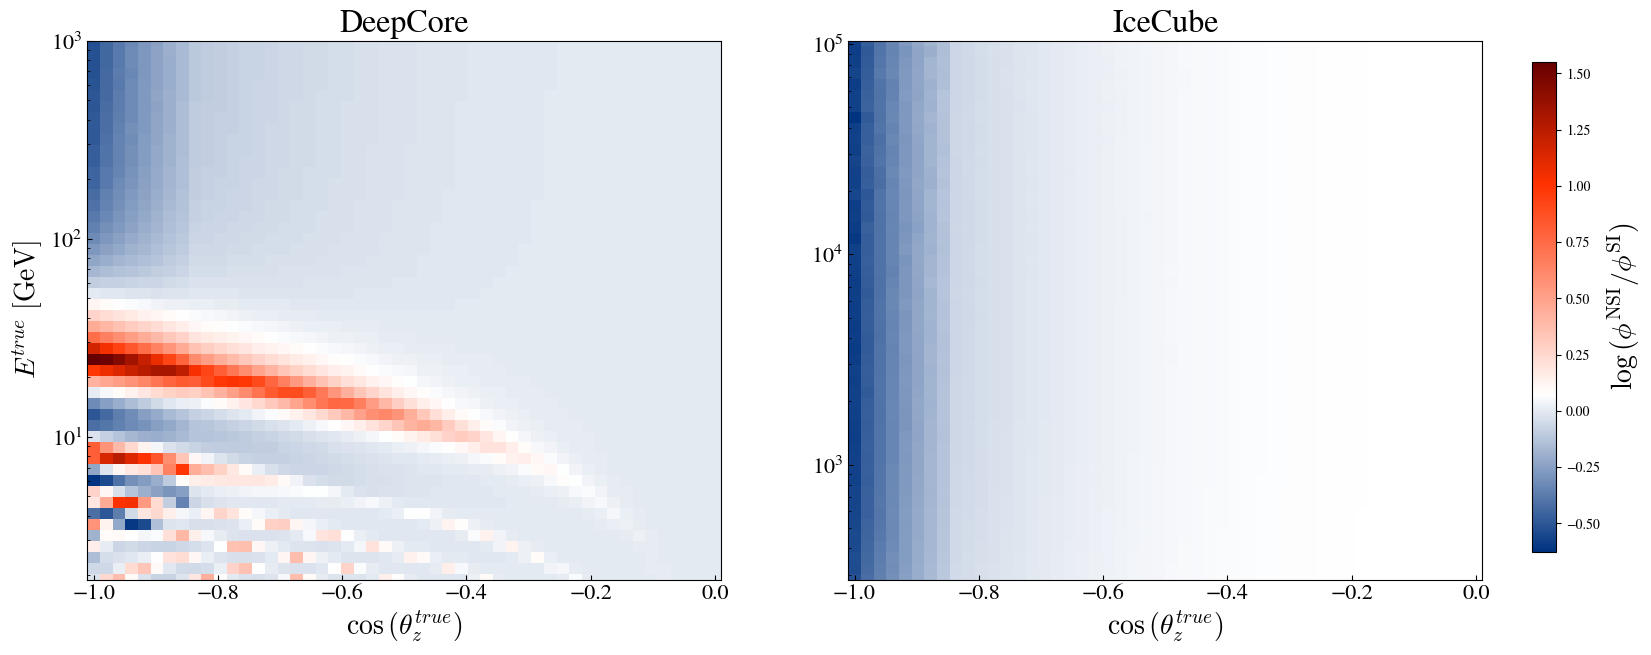

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(9 * 2, 7), squeeze=True)

c1 = ax[0].pcolormesh(
    z_range,
    DC_range,
    np.log10(flux_emt_DC_track[1].T),
    cmap=dc_cmap,
    edgecolor=None,
    shading="auto",
    rasterized=True,
)  # vmin=-1,vmax=3)#) norm = CenteredNorm(0),
c2 = ax[1].pcolormesh(
    z_range,
    IC_range,
    np.log10(flux_emt_IC_track[1].T),
    cmap=ic_cmap,
    edgecolor=None,
    shading="auto",
    rasterized=True,
)  # vmin=-1,vmax=3)#

# ax[0].set_title(r'$\nu_{e/\tau} + \bar\nu_{e/\tau}$ flux ratio', fontsize=20)
# ax[1].set_title(r'$\nu_\mu + \bar\nu_\mu$ flux ratio', fontsize=20)
ax[0].set_title(r"DeepCore", fontsize=23)
ax[1].set_title(r"IceCube", fontsize=23)

ax[0].set_xlabel(r"$\cos{(\theta^{true}_z)}$", fontsize=20)
ax[1].set_xlabel(r"$\cos{(\theta^{true}_z)}$", fontsize=20)
ax[0].tick_params(labelsize=16, direction="in", which="both", axis="both")
ax[1].tick_params(labelsize=16, direction="in", which="both", axis="both")
ax[0].set_ylabel(r"$E^{true}\,\,\mathrm{[GeV]}$", fontsize=20)
ax[0].set_yscale("log")
ax[1].set_yscale("log")

cax = fig.add_axes([0.8, 0.15, 0.15, 0.7])
cbar = plt.colorbar(c1, ax=cax, pad=0.35)
cbar.set_label(r"$\log{(\phi^\text{NSI}/\phi^\text{SI})}$", fontsize=20)
_ = cax.axis("off")

ax[0].set_ylim(DC_range[0], DC_range[-1])
ax[1].set_ylim(IC_range[0], IC_range[-1])
# plt.suptitle(r'$(\phi_{\nu_\mu}^{NSI} + \phi_{\bar\nu_\mu}^{NSI})/(\phi_{\nu_\mu}^{SI} + \phi_{\bar\nu_\mu}^{SI})$', fontsize=25)

#plt.savefig("./article/figures/flux_ratio.pdf", bbox_inches="tight")
